In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import math
%matplotlib inline

import sys
sys.path.insert(0, '../scripts')

import stft_zoom, display, detect_musical_regions
from util import *
import mappings
import pickle
import PIL
import IPython.display
from classes import SingleResSpectrogram, MultiResSpectrogram

/Library/Python/3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/Library/Python/3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
def energy_reference(y, time_range, freq_range, sr=44100):
    y_slice = y[math.floor(time_range[0] * sr): math.floor(time_range[1] * sr)]
    spec = np.fft.rfft(y_slice)
    freqs = np.fft.rfftfreq(len(y_slice), 1./sr)
    idx_start = find_nearest(freqs, freq_range[0])
    idx_stop = find_nearest(freqs, freq_range[1])
    return np.sum(np.abs(spec[idx_start:idx_stop])**2) / len(y_slice)

def normalize_subregion(spec_zoom, time_range, freq_range, y):
    energy_ref = energy_reference(y, time_range, freq_range)
    energy_old = np.sum(spec_zoom ** 2)
    return math.sqrt(energy_ref / energy_old) * spec_zoom

In [14]:
model = pickle.load(open('renyi_shannon_prollharm_model.sav', 'rb'))
y, sr = librosa.load('../data/example.wav', sr=44100)

/Library/Python/3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GaussianNB from version 0.19.0 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### 1.1 Our multiresolution spectrogram - with no signal bank and no normalization

In [9]:
%%timeit

n_fft = 2048
kernel = [800,800]
spec = np.abs(librosa.stft(y, n_fft=n_fft))
time_span = [0,len(y)/sr]
x_axis, y_axis = stft_zoom.get_axes_values(sr, 0, time_span, spec.shape) 
base_spec = SingleResSpectrogram(spec, x_axis, y_axis)
multires_spec = MultiResSpectrogram(base_spec)

indices, original_shape = detect_musical_regions.detect_musical_regions(model, spec, mode='threshold', pct_or_threshold=0.8)
to_be_refined = detect_musical_regions.musical_regions_to_ranges(indices, original_shape, x_axis, y_axis, kernel)

# stft_zoom.set_signal_bank(y,kernel)
# multires_spec.base_spec.spec = np.array(normalize_subregion(spec, [0,len(y)*sr], [0,22050], y), dtype=object)

for subregion in to_be_refined:
    freq_range = subregion[0]
    time_range = subregion[1]
    spec_zoom, x_axis, y_axis, new_sr, window_size, hop_size = stft_zoom.stft_zoom_nobank(y, freq_range, time_range, sr=sr, original_window_size=n_fft, k=5)
    
#     spec_zoom = normalize_subregion(spec_zoom, time_range, freq_range, y)

    
    refined_subspec = SingleResSpectrogram(spec_zoom, x_axis, y_axis)
    multires_spec.insert_zoom(multires_spec.base_spec, refined_subspec, zoom_level=1)

N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  8
ring mod + lpf
N =  8
ring mod + lpf
N =  11
ring mod + lpf
N =  8
ring mod + lpf
N =  8
ring mod + lpf
N =  11
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  11
ring mod + lpf
N =  8
ring mod + lpf
N =  11
ring mod + lpf
N =  6
ring mod + lpf
N =  8
ring mod + lpf
N =  8
ring mod + lpf
N =  8
ring mod + lpf
N =  8
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  6

### 1.2 Our multiresolution spectrogram - with signal bank and no normalization

In [10]:
%%timeit

n_fft = 2048
kernel = [800,800]
spec = np.abs(librosa.stft(y, n_fft=n_fft))
time_span = [0,len(y)/sr]
x_axis, y_axis = stft_zoom.get_axes_values(sr, 0, time_span, spec.shape) 
base_spec = SingleResSpectrogram(spec, x_axis, y_axis)
multires_spec = MultiResSpectrogram(base_spec)

indices, original_shape = detect_musical_regions.detect_musical_regions(model, spec, mode='threshold', pct_or_threshold=0.8)
to_be_refined = detect_musical_regions.musical_regions_to_ranges(indices, original_shape, x_axis, y_axis, kernel)

stft_zoom.set_signal_bank(y,kernel)
# multires_spec.base_spec.spec = np.array(normalize_subregion(spec, [0,len(y)*sr], [0,22050], y), dtype=object)

for subregion in to_be_refined:
    freq_range = subregion[0]
    time_range = subregion[1]
    spec_zoom, x_axis, y_axis, new_sr, window_size, hop_size = stft_zoom.stft_zoom(y, freq_range, time_range, sr=sr, original_window_size=n_fft, k=5)
    
#     spec_zoom = normalize_subregion(spec_zoom, time_range, freq_range, y)
    
    refined_subspec = SingleResSpectrogram(spec_zoom, x_axis, y_axis)
    multires_spec.insert_zoom(multires_spec.base_spec, refined_subspec, zoom_level=1)

N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  8
ring mod + lpf
N =  11
ring mod + lpf
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.664

N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  8
ring mod + lpf
N =  11
ring mod + lpf
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.664

N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  8
ring mod + lpf
N =  11
ring mod + lpf
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.664

### 1.3 Our multiresolution spectrogram - with signal bank and normalization

In [11]:
%%timeit

n_fft = 2048
kernel = [800,800]
spec = np.abs(librosa.stft(y, n_fft=n_fft))
time_span = [0,len(y)/sr]
x_axis, y_axis = stft_zoom.get_axes_values(sr, 0, time_span, spec.shape) 
base_spec = SingleResSpectrogram(spec, x_axis, y_axis)
multires_spec = MultiResSpectrogram(base_spec)

indices, original_shape = detect_musical_regions.detect_musical_regions(model, spec, mode='threshold', pct_or_threshold=0.8)
to_be_refined = detect_musical_regions.musical_regions_to_ranges(indices, original_shape, x_axis, y_axis, kernel)

stft_zoom.set_signal_bank(y,kernel)
multires_spec.base_spec.spec = np.array(normalize_subregion(spec, [0,len(y)*sr], [0,22050], y), dtype=object)

for subregion in to_be_refined:
    freq_range = subregion[0]
    time_range = subregion[1]
    spec_zoom, x_axis, y_axis, new_sr, window_size, hop_size = stft_zoom.stft_zoom(y, freq_range, time_range, sr=sr, original_window_size=n_fft, k=5)
    
    spec_zoom = normalize_subregion(spec_zoom, time_range, freq_range, y)
    
    refined_subspec = SingleResSpectrogram(spec_zoom, x_axis, y_axis)
    multires_spec.insert_zoom(multires_spec.base_spec, refined_subspec, zoom_level=1)

N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  8
ring mod + lpf
N =  11
ring mod + lpf
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.664

N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  8
ring mod + lpf
N =  11
ring mod + lpf
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.664

N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  8
ring mod + lpf
N =  11
ring mod + lpf
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.664

### 1.4 Our multiresolution spectrogram - with signal bank and "simple" normalization

In [4]:
%%timeit

n_fft = 2048
kernel = [800,800]
spec = np.abs(librosa.stft(y, n_fft=n_fft))
time_span = [0,len(y)/sr]
x_axis, y_axis = stft_zoom.get_axes_values(sr, 0, time_span, spec.shape) 
base_spec = SingleResSpectrogram(spec, x_axis, y_axis)
multires_spec = MultiResSpectrogram(base_spec)

norm_ref = np.max(spec)

indices, original_shape = detect_musical_regions.detect_musical_regions(model, spec, mode='threshold', pct_or_threshold=0.8)
to_be_refined = detect_musical_regions.musical_regions_to_ranges(indices, original_shape, x_axis, y_axis, kernel)

stft_zoom.set_signal_bank(y,kernel)
# multires_spec.base_spec.spec = np.array(normalize_subregion(spec, [0,len(y)*sr], [0,22050], y), dtype=object)

for subregion in to_be_refined:
    freq_range = subregion[0]
    time_range = subregion[1]
    spec_zoom, x_axis, y_axis, new_sr, window_size, hop_size = stft_zoom.stft_zoom(y, freq_range, time_range, sr=sr, original_window_size=n_fft, k=5)
    
#     spec_zoom = normalize_subregion(spec_zoom, time_range, freq_range, y)
#     spec_zoom = spec_zoom * (norm_ref/np.max(spec_zoom))
    
    refined_subspec = SingleResSpectrogram(spec_zoom, x_axis, y_axis)
    multires_spec.insert_zoom(multires_spec.base_spec, refined_subspec, zoom_level=1)

N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  8
ring mod + lpf
N =  11
ring mod + lpf
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.664

ring mod + lpf
N =  11
ring mod + lpf
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.6640625, 689.0625] used signal bank
[150.732421875, 25

N =  6
ring mod + lpf
N =  6
ring mod + lpf
N =  8
ring mod + lpf
N =  11
ring mod + lpf
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.664

### 2. A simple STFT

In [13]:
%%timeit
spec = np.abs(librosa.stft(y, n_fft=15000))

21 ms ± 292 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
# or....

In [15]:
%%timeit

n_fft = 2048
kernel = [800,800]
spec = np.abs(librosa.stft(y, n_fft=n_fft))
time_span = [0,len(y)/sr]
x_axis, y_axis = stft_zoom.get_axes_values(sr, 0, time_span, spec.shape) 
base_spec = SingleResSpectrogram(spec, x_axis, y_axis)
multires_spec = MultiResSpectrogram(base_spec)

norm_ref = np.max(spec)

freq_range = [0.0,22050.0]
time_range = [0, len(y / sr)]
spec_zoom, x_axis, y_axis, new_sr, window_size, hop_size = stft_zoom.stft_zoom(y, freq_range, time_range, sr=sr, original_window_size=n_fft, k=5)
    
spec_zoom = spec_zoom * (norm_ref/np.max(spec_zoom))
    
refined_subspec = SingleResSpectrogram(spec_zoom, x_axis, y_axis)
multires_spec.insert_zoom(multires_spec.base_spec, refined_subspec, zoom_level=1)

[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not use signal bank
[0.0, 22050.0] did not us

### 3. Comparing visualizations

In [30]:
n_fft = 2048
kernel = [800,800]
spec = np.abs(librosa.stft(y, n_fft=n_fft))
time_span = [0,len(y)/sr]
x_axis, y_axis = stft_zoom.get_axes_values(sr, 0, time_span, spec.shape) 
base_spec = SingleResSpectrogram(spec, x_axis, y_axis)
multires_spec = MultiResSpectrogram(base_spec)

indices, original_shape = detect_musical_regions.detect_musical_regions(model, spec, mode='threshold', pct_or_threshold=0.8)
to_be_refined = detect_musical_regions.musical_regions_to_ranges(indices, original_shape, x_axis, y_axis, kernel)

for subregion in to_be_refined:
    freq_range = subregion[0]
    time_range = subregion[1]
    spec_zoom, x_axis, y_axis, new_sr, window_size, hop_size = stft_zoom.stft_zoom(y, freq_range, time_range, sr=sr, original_window_size=n_fft, k=5)
    refined_subspec = SingleResSpectrogram(spec_zoom, x_axis, y_axis)
    multires_spec.insert_zoom(multires_spec.base_spec, refined_subspec, zoom_level=1)

[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[258.3984375, 430.6640625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[430.6640625, 689.0625] used signal bank
[258.3984375, 430.6640625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[689.0625, 1098.193359375] used signal bank
[430.6640625, 689.0625] used signal bank
[430.6640625, 689.0625] used signal bank
[150.732421875, 258.3984375] used signal bank
[258.39843

In [31]:
multires_vis = librosa.amplitude_to_db(multires_spec.generate_visualization(), ref=np.max)

In [32]:
singleres_spec = librosa.amplitude_to_db(np.abs(librosa.stft(y, n_fft=12000)), ref=np.max)

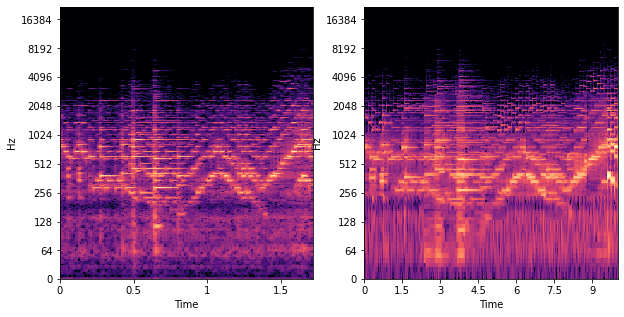

In [33]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
librosa.display.specshow(singleres_spec, y_axis='log', x_axis='time', sr=sr)

plt.subplot(1,2,2)
librosa.display.specshow(multires_vis, y_axis='log', x_axis='time', sr=sr)

### 4. CQT 

In [41]:
%%timeit
cqt = np.abs(librosa.cqt(y, sr=sr, bins_per_octave=24, fmin=20, n_bins=10*24))

243 ms ± 6.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
